Đang đọc file: /content/drive/MyDrive/Dữ liệu/BK_20_Test_3_clean.csv
Tìm thấy 18 đặc trưng số: ['Buffer pressure min', 'Buffer pressure max', 'Annulus pressure min', 'Annulus pressure max', 'Flow pressure min', 'Flow pressure max', 'T min', 'T max', 'Qliq', 'Qoil', 'Water cut', 'Qgas', 'Choke', 'Gas factor', 'Gas injection rate', 'Downtime', 'Potential oil production', 'Potential liquid production']


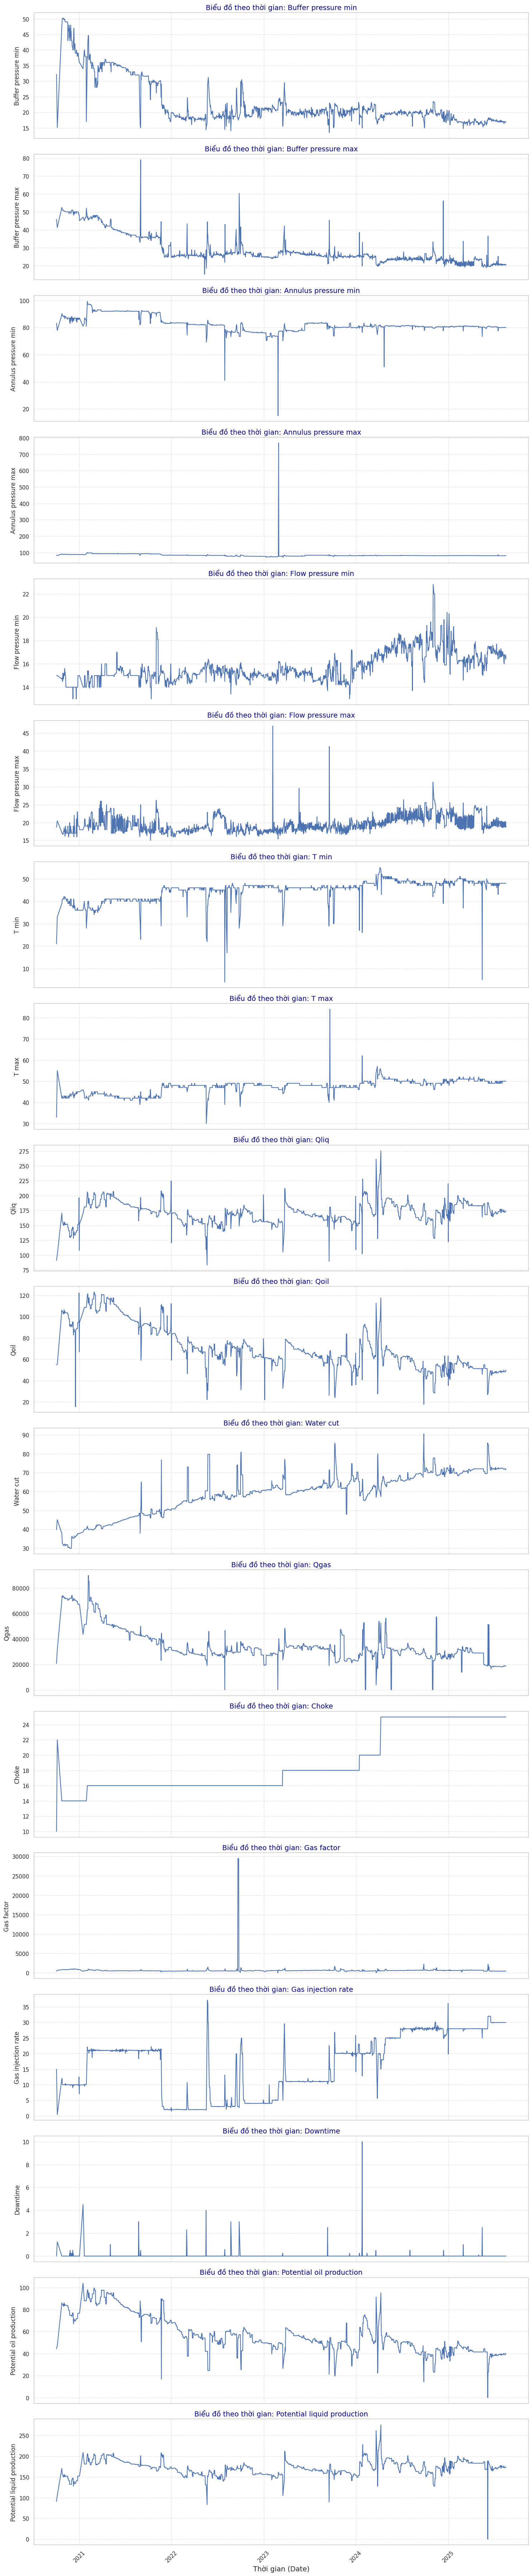

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# 1. Kết nối Google Drive
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# 2. Đường dẫn file
file_path = "/content/drive/MyDrive/Dữ liệu/BK_20_Test_3_clean.csv"

try:
    # Đọc dữ liệu
    print(f"Đang đọc file: {file_path}")
    df = pd.read_csv(file_path)

    # 3. Xử lý cột Date
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values('Date')

        # Lấy danh sách các cột số (loại bỏ cột Date và các cột không phải số)
        numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

        # Loại bỏ các cột không cần thiết nếu có (ví dụ: cột index cũ, cột id...)
        # numeric_cols = [col for col in numeric_cols if col not in ['Unnamed: 0', 'id']]

        num_features = len(numeric_cols)
        print(f"Tìm thấy {num_features} đặc trưng số: {numeric_cols}")

        if num_features > 0:
            # 4. Vẽ biểu đồ: Tạo subplots (mỗi đặc trưng 1 biểu đồ con)
            # figsize: Chiều rộng 15, chiều cao tự động tăng theo số lượng đặc trưng
            fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(15, 4 * num_features), sharex=True)

            # Xử lý trường hợp chỉ có 1 đặc trưng (axes không phải là list)
            if num_features == 1:
                axes = [axes]

            for ax, col in zip(axes, numeric_cols):
                # Vẽ line plot cho từng cột
                sns.lineplot(data=df, x='Date', y=col, ax=ax, linewidth=1.5)

                # Trang trí biểu đồ con
                ax.set_title(f'Biểu đồ theo thời gian: {col}', fontsize=14, color='navy')
                ax.set_ylabel(col, fontsize=12)
                ax.grid(True, linestyle='--', alpha=0.6)

                # Đánh dấu các điểm dữ liệu nếu ít điểm (tùy chọn)
                # ax.scatter(df['Date'], df[col], s=10)

            # Cài đặt chung cho trục X (Date)
            plt.xlabel('Thời gian (Date)', fontsize=14)
            plt.xticks(rotation=45)

            plt.tight_layout() # Tự động căn chỉnh khoảng cách
            plt.show()
        else:
            print("Không tìm thấy cột dữ liệu số nào để vẽ.")

    else:
        print("Lỗi: File không có cột 'Date'. Vui lòng kiểm tra lại tên cột.")
        print("Các cột hiện có:", df.columns.tolist())

except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

Đang đọc file: /content/drive/MyDrive/Dữ liệu/BK_20_Test_3_clean.csv
Tổng số đặc trưng cần vẽ: 18


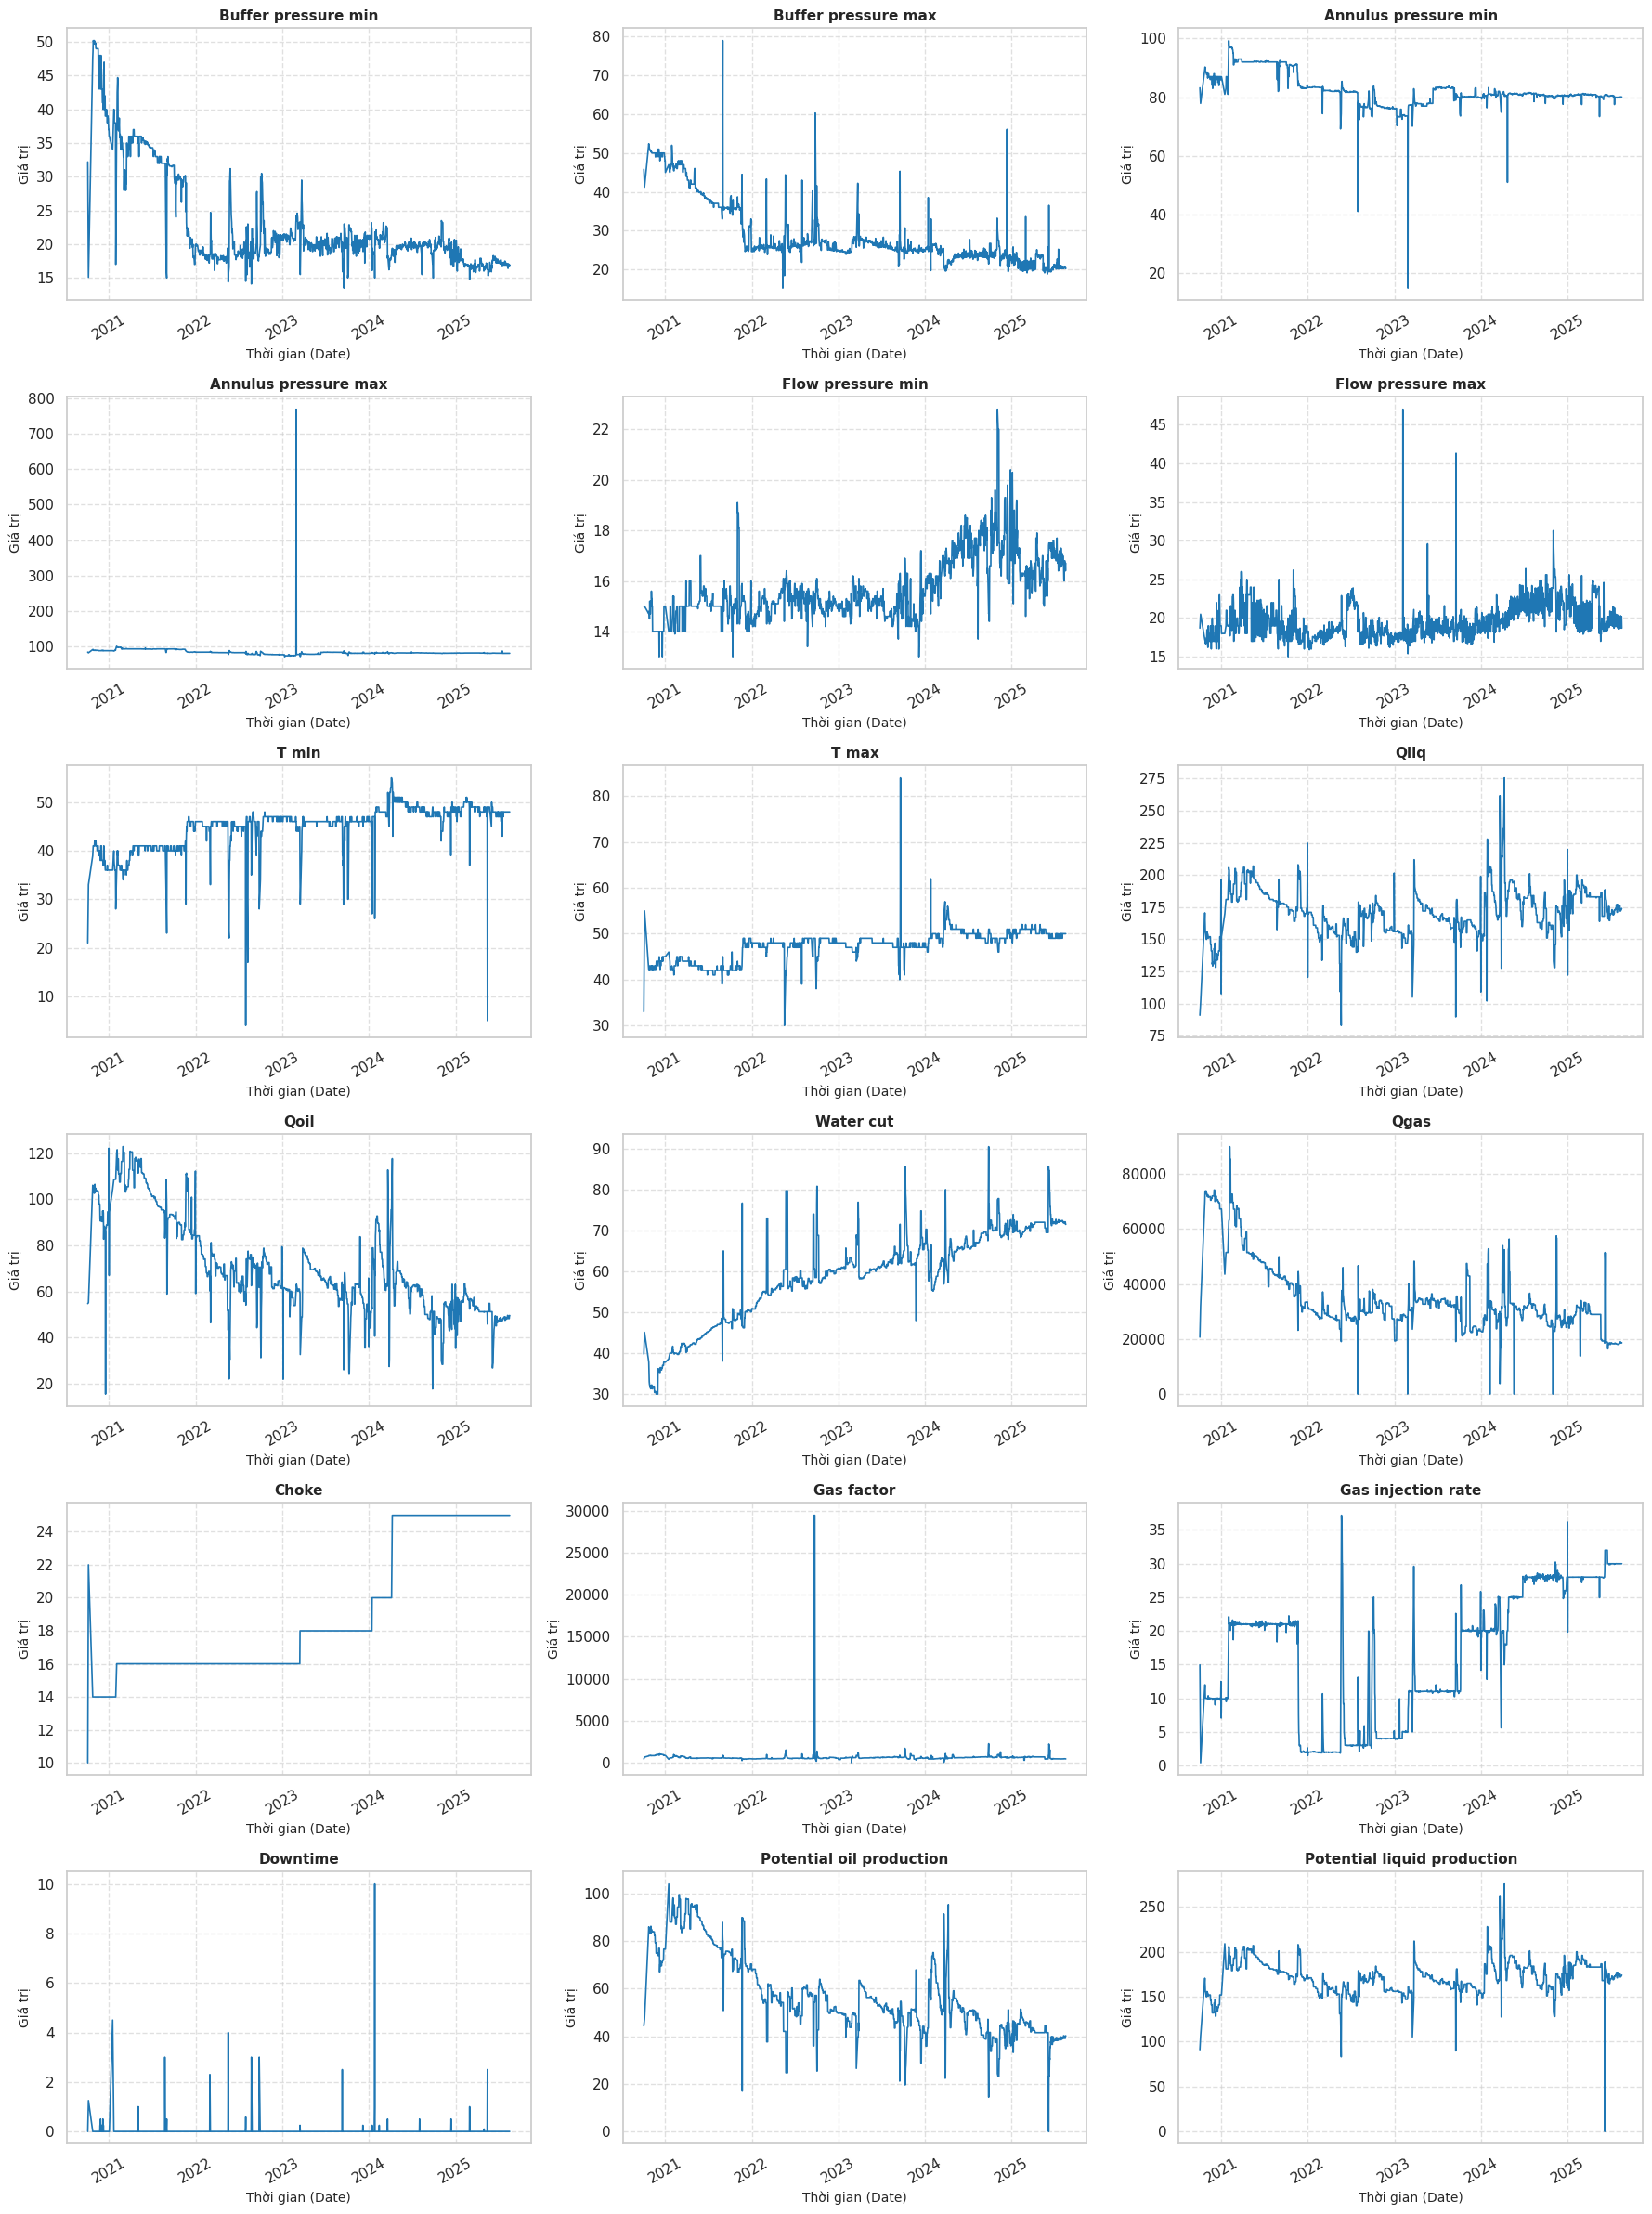

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from google.colab import drive
import os

# 1. Kết nối Google Drive
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Dữ liệu/BK_20_Test_3_clean.csv"

try:
    print(f"Đang đọc file: {file_path}")
    df = pd.read_csv(file_path)

    # 2. Xử lý dữ liệu
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values('Date')
        x_axis = df['Date']
        x_label = 'Thời gian (Date)'
    else:
        x_axis = df.index
        x_label = 'Thời điểm (Index)'

    # Lấy danh sách cột số (loại bỏ cột không cần thiết)
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cols_to_exclude = ['Unnamed: 0', 'id']
    numeric_cols = [col for col in numeric_cols if col not in cols_to_exclude]

    num_features = len(numeric_cols)
    print(f"Tổng số đặc trưng cần vẽ: {num_features}")

    if num_features > 0:
        # --- CẤU HÌNH SỐ CỘT TẠI ĐÂY ---
        ncols = 3  # Đặt là 3 cột
        nrows = math.ceil(num_features / ncols) # Tự động tính số dòng

        # Tăng chiều rộng (18) để chứa đủ 3 cột mà không bị rối
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 4 * nrows))

        # Làm phẳng mảng axes để dễ lặp
        axes = axes.flatten()

        for i, col in enumerate(numeric_cols):
            ax = axes[i]

            # Vẽ biểu đồ
            ax.plot(x_axis, df[col], label=col, linewidth=1.2, color='tab:blue')
            # Nếu muốn màu sắc ngẫu nhiên hoặc khác nhau cho từng cột, có thể chỉnh tham số color

            ax.set_title(f"{col}", fontsize=11, fontweight='bold')
            ax.set_ylabel("Giá trị", fontsize=10)
            ax.set_xlabel(x_label, fontsize=10)
            ax.grid(True, linestyle='--', alpha=0.6)

            # Xoay nhãn trục X một chút nếu bị chồng chéo
            ax.tick_params(axis='x', rotation=30)

        # Xóa các ô trống thừa (nếu tổng số biểu đồ không chia hết cho 3)
        for i in range(num_features, len(axes)):
            fig.delaxes(axes[i])

        plt.tight_layout()
        plt.show()

    else:
        print("Không có cột dữ liệu số nào để vẽ.")

except FileNotFoundError:
    print(f"Không tìm thấy file: {file_path}")
except Exception as e:
    print(f"Lỗi: {e}")